# new_daily_price ratio

## Improvement to be made
- add rate of return to the features **DONE**
- add different transformations to the features
- add benchmark(SVM is so) to the existing model sets
- try some standardization methods
- try some classifiers: add neural network, add adaboosting and gradient boosting, ensemble methods, etc **DONE**
- conduct feature selection : Remove collineariry, RFE, tree-based methods, then rerun the models **DONE**
- conduct dimension reduction, then rerun the models **DONE**
- use RFC with logistic regression, and select top 5 features to build a logistic regression to study the effect of geo feature(s). **DONE**
- add accuracy evaluation **DONE**

# Feature Engeneering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pylab as plt

from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
ua=pd.read_csv('UA.csv')
ua['time']=pd.DatetimeIndex(pd.to_datetime(ua['Date']))
ua=ua.set_index('time')
ua=ua.rename(columns={'Close':'ua_price'})
ua=ua.rename(columns={'Volume':'ua_stkv'})
ua.head()

,Date,Open,High,Low,ua_price,Adj Close,ua_stkv
time,,,,,,,
2018-01-02,2018-01-02,13.45,14.010,13.23,13.97,13.97,6264800
2018-01-03,2018-01-03,13.97,14.470,13.97,14.40,14.40,4839600
2018-01-04,2018-01-04,14.44,14.790,14.28,14.75,14.75,6026600
2018-01-05,2018-01-05,14.75,15.690,14.71,14.73,14.73,9431300
2018-01-08,2018-01-08,14.69,15.139,14.64,14.78,14.78,4838100


In [3]:
nike=pd.read_csv('NKE.csv')
nike['time']=pd.DatetimeIndex(pd.to_datetime(nike['Date']))
nike=nike.set_index('time')
nike=nike.rename(columns={'Close':'nike_price'})
nike=nike.rename(columns={'Volume':'nike_stkv'})
nike.head()

,Date,Open,High,Low,nike_price,Adj Close,nike_stkv
time,,,,,,,
2018-01-02,2018-01-02,62.849998,63.490002,62.849998,63.490002,63.122215,6511000
2018-01-03,2018-01-03,63.480000,63.660000,62.759998,63.480000,63.112270,6091100
2018-01-04,2018-01-04,63.400002,63.549999,62.549999,63.439999,63.072506,5780500
2018-01-05,2018-01-05,63.700001,64.300003,63.470001,63.980000,63.609375,11632300
2018-01-08,2018-01-08,64.150002,64.709999,63.980000,64.550003,64.176079,11905700


In [4]:
ua_price=ua.ua_price
nike_price=nike.nike_price
ua_stkv=ua.ua_stkv
nike_stkv=nike.nike_stkv

In [5]:
# load data
total=pd.read_csv('alldata.csv')
total=total.rename(columns={'Unnamed: 0':'time'})
total['time']=pd.DatetimeIndex(pd.to_datetime(total['time']))
total=total.set_index('time')
total.head(3)

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff
time,,,,,,,,,,,,,
2018-01-02 09:00:00,100.0,125.0,14.58,62.80,4100.0,3483.0,0.0000,NaN,2.0,6.0,0.800000,0.232166,NaN
2018-01-02 09:30:00,97.0,91.0,14.50,63.02,1052000.0,764981.0,NaN,NaN,4.0,8.0,1.065934,0.230086,NaN
2018-01-02 10:00:00,289.0,109.0,14.52,63.15,654032.0,412408.0,-0.0399,0.0988,4.0,6.0,2.651376,0.229929,-0.1387


In [6]:
# transform the original 30-min data to daily data
count=total[['ua_count','nike_count']].resample('D').sum()

# price=total[['ua_price','nike_price']].resample('D').last()

# stkv=total[['ua_stkv','nike_stkv']].resample('D').sum()

tweet=total[['ua_tweet','nike_tweet']].resample('D').mean()

twtcount=total[['ua_twtcount','nike_twtcount']].resample('D').sum()

total = pd.concat([count,ua_price,nike_price,ua_stkv,nike_stkv,tweet,twtcount], axis=1)

In [7]:
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
time,,,,,,,,,,
2018-01-02,17208.0,11462.0,13.97,63.490002,6264800.0,6511000.0,-0.126660,0.009564,221.0,147.0
2018-01-03,14624.0,12891.0,14.40,63.480000,4839600.0,6091100.0,0.008900,-0.008924,130.0,166.0
2018-01-04,12620.0,9202.0,14.75,63.439999,6026600.0,5780500.0,-0.058659,-0.020256,194.0,155.0
2018-01-05,15099.0,10409.0,14.73,63.980000,9431300.0,11632300.0,-0.047855,0.057341,237.0,164.0
2018-01-06,25773.0,17663.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [8]:
total['count_ratio']=total.ua_count/total.nike_count

total['price_ratio']=total.ua_price/total.nike_price

total['tweet_diff']=total.ua_tweet-total.nike_tweet

total['stkv_ratio']=total.ua_stkv/total.nike_stkv

total['twtcount_ratio']=total.ua_twtcount/total.nike_twtcount

In [9]:
# total.tweet_diff.sort_values()

total.head(3)

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-02,17208.0,11462.0,13.97,63.490002,6264800.0,6511000.0,-0.126660,0.009564,221.0,147.0,1.501309,0.220035,-0.136224,0.962187,1.503401
2018-01-03,14624.0,12891.0,14.40,63.480000,4839600.0,6091100.0,0.008900,-0.008924,130.0,166.0,1.134435,0.226843,0.017824,0.794536,0.783133
2018-01-04,12620.0,9202.0,14.75,63.439999,6026600.0,5780500.0,-0.058659,-0.020256,194.0,155.0,1.371441,0.232503,-0.038403,1.042574,1.251613


In [10]:
total.shape

(165, 15)

In [11]:
ssize = 8
msize = 10
bsize = 12

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=22, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title
plt.rc('font',weight='bold')

In [12]:
plt.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"

Text(0, 0.5, 'UA Stock Price')

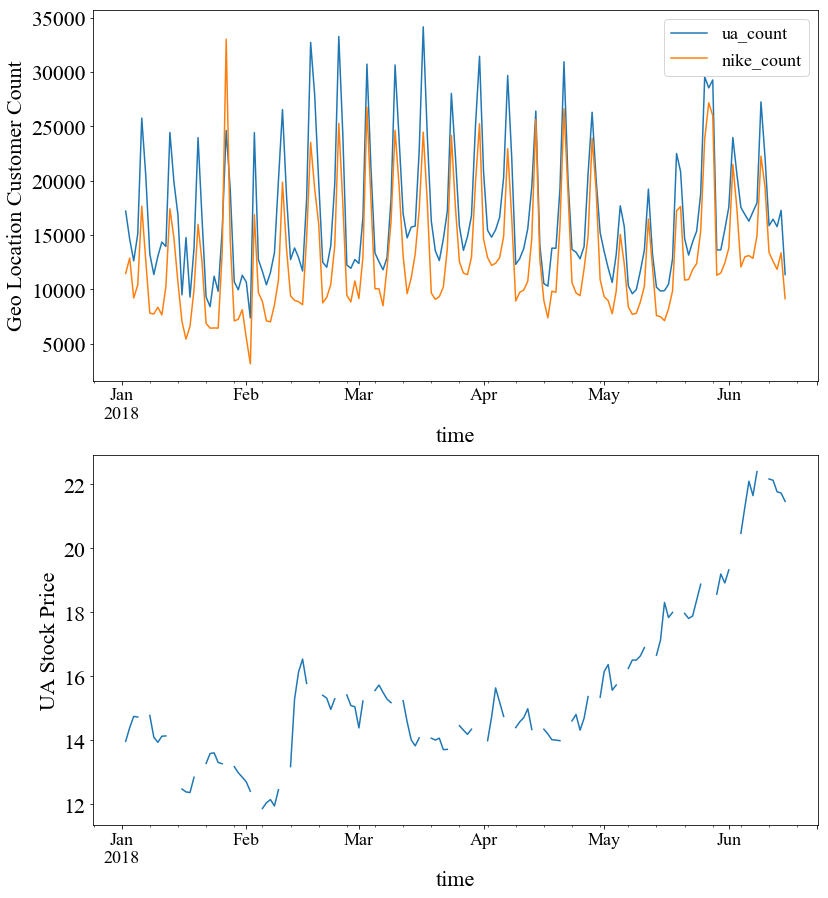

In [13]:
# plot the daily data
alldata1=total

figure=plt.figure(figsize=(13,15))
axes1=figure.add_subplot(2,1,1)
alldata1[['ua_count','nike_count']].plot(ax=axes1)

axes2=figure.add_subplot(2,1,2)
alldata1['ua_price'].plot(ax=axes2)


axes1.set_ylabel('Geo Location Customer Count',fontname="Times New Roman")
axes2.set_ylabel('UA Stock Price',fontname="Times New Roman")

Text(0, 0.5, 'Stock price ratio')

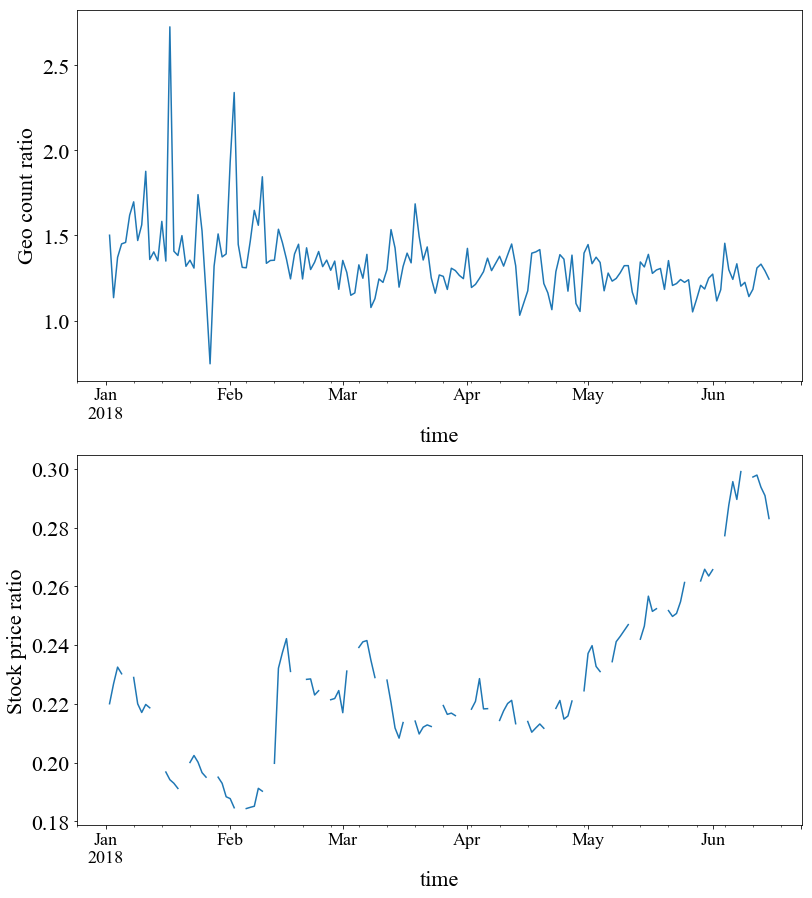

In [14]:
figure=plt.figure(figsize=(13,15))
axes1=figure.add_subplot(2,1,1)
alldata1['count_ratio'].plot(ax=axes1)

axes2=figure.add_subplot(2,1,2)
alldata1['price_ratio'].plot(ax=axes2)

axes1.set_ylabel('Geo count ratio')
axes2.set_ylabel('Stock price ratio')

In [15]:
# remove the missing values
total=total.dropna()
total.shape

(115, 15)

In [16]:
# create labels for classification
value_ua = total.ua_price.shift(-1)-total.ua_price
value_nike=total.nike_price.shift(-1)-total.nike_price
value_ratio=total.price_ratio.shift(-1)-total.price_ratio

value_ua[value_ua>=0]=1
value_ua[value_ua<0]=0 
value_nike[value_nike>=0]=1
value_nike[value_nike<0]=0 
value_ratio[value_ratio>=0]=1
value_ratio[value_ratio<0]=0

print(value_ua.shape)
print(value_nike.shape)
print(value_ratio.shape)

(115,)
(115,)
(115,)


In [17]:
# rename the geo-related features
total=total.rename(columns={'ua_count':'geo_ua_count'})
total=total.rename(columns={'nike_count':'geo_nike_count'})
total=total.rename(columns={'count_ratio':'geo_count_ratio'})

In [18]:
# add rate of returns
return_ua=total.ua_price/total.ua_price.shift(1)-1
return_nike=total.nike_price/total.nike_price.shift(1)-1
return_diff=return_ua-return_nike

In [19]:
# add labels and rate of returns to the dataframe
total['return_ua']=return_ua
total['return_nike']=return_nike
total['return_diff']=return_diff
total['value_ua']=value_ua
total['value_nike']=value_nike
total['value_ratio']=value_ratio

In [20]:
total[['ua_tweet','nike_tweet','tweet_diff']]=total[['ua_tweet','nike_tweet','tweet_diff']].fillna(method='bfill')

In [21]:
print(total.shape)
print(total.dropna().shape)

(115, 21)
(113, 21)


In [22]:
total1=total.dropna()
total1.head()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,...,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
time,,,,,,,,,,,,,,,,,,,,,
2018-01-03,14624.0,12891.0,14.40,63.480000,4839600.0,6091100.0,0.008900,-0.008924,130.0,166.0,...,0.226843,0.017824,0.794536,0.783133,0.030780,-0.000158,0.030938,1.0,0.0,1.0
2018-01-04,12620.0,9202.0,14.75,63.439999,6026600.0,5780500.0,-0.058659,-0.020256,194.0,155.0,...,0.232503,-0.038403,1.042574,1.251613,0.024306,-0.000630,0.024936,0.0,1.0,0.0
2018-01-05,15099.0,10409.0,14.73,63.980000,9431300.0,11632300.0,-0.047855,0.057341,237.0,164.0,...,0.230228,-0.105196,0.810785,1.445122,-0.001356,0.008512,-0.009868,1.0,1.0,0.0
2018-01-08,13262.0,7812.0,14.78,64.550003,4838100.0,11905700.0,0.015410,0.003313,84.0,169.0,...,0.228970,0.012097,0.406368,0.497041,0.003394,0.008909,-0.005515,0.0,0.0,0.0
2018-01-09,11369.0,7732.0,14.10,64.089996,8791400.0,8771300.0,-0.185152,-0.030452,381.0,188.0,...,0.220003,-0.154700,1.002292,2.026596,-0.046008,-0.007126,-0.038882,0.0,1.0,0.0


In [23]:
total1.columns

Index(['geo_ua_count', 'geo_nike_count', 'ua_price', 'nike_price', 'ua_stkv',
       'nike_stkv', 'ua_tweet', 'nike_tweet', 'ua_twtcount', 'nike_twtcount',
       'geo_count_ratio', 'price_ratio', 'tweet_diff', 'stkv_ratio',
       'twtcount_ratio', 'return_ua', 'return_nike', 'return_diff', 'value_ua',
       'value_nike', 'value_ratio'],
      dtype='object')

In [24]:
#seperate the data into train and test sets
X=total1.drop(total1.columns[[18,19,20]],axis=1)

y=total1.value_ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [25]:
print(X.shape)
print(y.shape)

(113, 18)
(113,)


# EDA

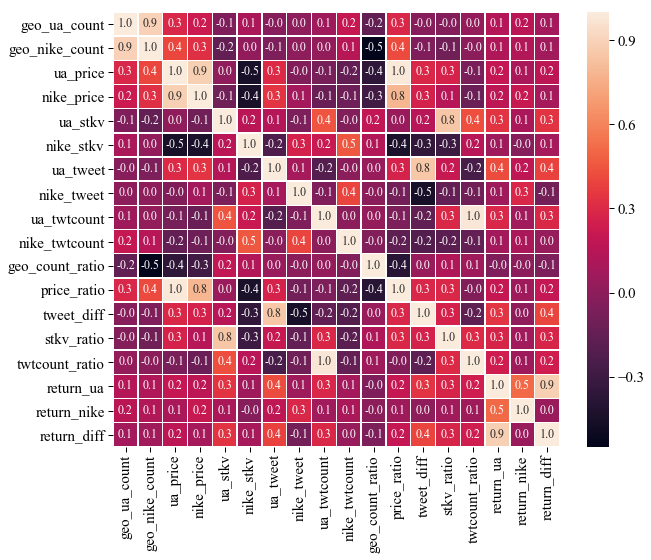

In [26]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":24,"axes.labelsize":18, "xtick.labelsize":15, "ytick.labelsize":15}) # set the background

#correlation map
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Number of ups:  61
Number of downs :  52


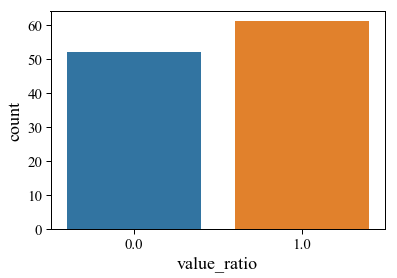

In [27]:
ax = sns.countplot(y,label="Count") 
ups, downs = y.value_counts()
print('Number of ups: ',ups)
print('Number of downs : ',downs)

In [28]:
data_y = y
data_x = X
data_s = (data_x - data_x.mean()) / (data_x.std()) #standardize

In [29]:
X.shape

(113, 18)

# Model Fitting

In [30]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neural_network import MLPClassifier #neural network
#import xgboost as xg #xgboost

In [31]:
#feature selection and evaluation
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,accuracy_score #for confusion matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,cross_val_predict,TimeSeriesSplit

In [32]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Baseline Model

### Hyper-Parameters Tuning

##### SVM 

In [33]:
C=range(10,300,10)
gamma=[1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
# kernel=['rbf','linear']
hyper={'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 319 candidates, totalling 957 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5398230088495575
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 957 out of 957 | elapsed:    3.5s finished


#### Random Forest

In [34]:
n_estimators=range(10,100,10)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.4690265486725664
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.2s finished


#### KNN

In [35]:
n_neighbors=[2,3,4,5,6,7,8,9,10]
weights=['uniform','distance']
hyper={'n_neighbors':n_neighbors,'weights':weights}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.6548672566371682
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.2s finished


### Cross Validation

In [36]:
#two cross validation method
# kfold = TimeSeriesSplit(n_splits=3)

kfold = StratifiedKFold(n_splits=3)

In [37]:
#standardization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_s= scaler.transform(X)
X_s.shape

(113, 18)

In [38]:
# aggregate all the methods in one plot
random_state = 4
classifiers = []
classifiers.append(svm.SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(n_estimators=10,random_state=random_state))
classifiers.append(KNeighborsClassifier(n_neighbors=2, p=2,weights='distance'))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LDA())
classifiers.append(QDA())
classifiers.append(GaussianNB())
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X, y, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Method":["SVC","DecisionTree",
"RandomForest","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis","NaiveBayes","NeuralNetwork",
                                                                                     "AdaBoosting","GradientBoosting"],"CrossValMeans":cv_means,"CrossValerrors": cv_std})
cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,KNeighboors,0.652807,0.082324
1,LogisticRegression,0.574036,0.052257
2,NeuralNetwork,0.557404,0.055372
3,QuadraticDiscriminantAnalysis,0.540310,0.022351
4,SVC,0.539848,0.000980
5,NaiveBayes,0.487179,0.037742
6,LinearDiscriminantAnalysis,0.469623,0.070367
7,RandomForest,0.434049,0.079047
8,DecisionTree,0.381843,0.076110
9,AdaBoosting,0.373296,0.084891


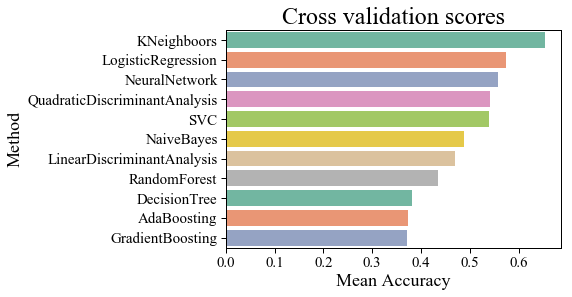

In [39]:
g = sns.barplot("CrossValMeans","Method",data = cv_res, palette="Set2")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

plt.show()

### Confusion Matrix and Accuracy

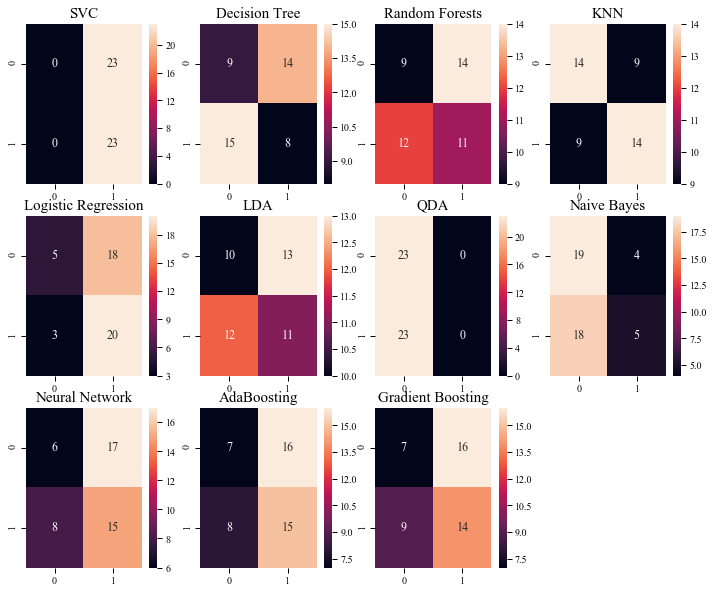

In [40]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":15, "xtick.labelsize":10, "ytick.labelsize":10}) # set the background

f,ax=plt.subplots(3,4,figsize=(12,10))

acc=[]

model=svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,0],annot=True,fmt='d')
ax[0,0].set_title('SVC')

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,1],annot=True,fmt='d')
ax[0,1].set_title('Decision Tree')

model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,2],annot=True,fmt='d')
ax[0,2].set_title('Random Forests')

model=KNeighborsClassifier(n_neighbors=2, p=2,weights='distance')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,3],annot=True,fmt='d')
ax[0,3].set_title('KNN')

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,0],annot=True,fmt='d')
ax[1,0].set_title('Logistic Regression')

model=LDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,1],annot=True,fmt='d')
ax[1,1].set_title('LDA')

model=QDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,2],annot=True,fmt='d')
ax[1,2].set_title('QDA')

model=GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,3],annot=True,fmt='d')
ax[1,3].set_title('Naive Bayes')

model=MLPClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,0],annot=True,fmt='d')
ax[2,0].set_title('Neural Network')

model=AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,1],annot=True,fmt='d')
ax[2,1].set_title('AdaBoosting')

model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,2],annot=True,fmt='d')
ax[2,2].set_title('Gradient Boosting')

ax[2,3].set_axis_off()

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [41]:
accdf = pd.DataFrame({"Accuracy":acc,"Algorithm":["SVC","DecisionTree",
"RandomForest","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis","NaiveBayes","NeuralNetwork",
                                                                                     "AdaBoosting","GradientBoosting"]})
accdf = accdf.sort_values(['Accuracy'],ascending=False).reset_index(drop=True)
accdf

,Accuracy,Algorithm
0,0.608696,KNeighboors
1,0.543478,LogisticRegression
2,0.521739,NaiveBayes
3,0.500000,SVC
4,0.500000,QuadraticDiscriminantAnalysis
5,0.478261,AdaBoosting
6,0.456522,LinearDiscriminantAnalysis
7,0.456522,NeuralNetwork
8,0.456522,GradientBoosting
9,0.434783,RandomForest


### Feature selection and importance

#### Correlation method

In [42]:
#correlation
X.columns

Index(['geo_ua_count', 'geo_nike_count', 'ua_price', 'nike_price', 'ua_stkv',
       'nike_stkv', 'ua_tweet', 'nike_tweet', 'ua_twtcount', 'nike_twtcount',
       'geo_count_ratio', 'price_ratio', 'tweet_diff', 'stkv_ratio',
       'twtcount_ratio', 'return_ua', 'return_nike', 'return_diff'],
      dtype='object')

### take geolocation factors out

In [43]:
# X2=X[['geo_ua_count','geo_nike_count','ua_price', 'nike_price', 'ua_stkv',
#        'nike_stkv', 'ua_tweet', 'nike_tweet', 'ua_twtcount', 'nike_twtcount',
#      'price_ratio', 'tweet_diff', 'stkv_ratio',
#        'twtcount_ratio', 'return_ua', 'return_nike', 'return_diff']]

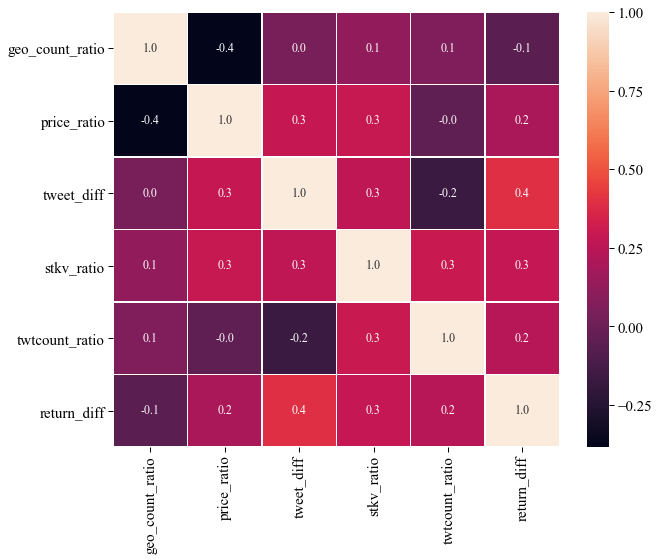

In [44]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":24,"axes.labelsize":18, "xtick.labelsize":15, "ytick.labelsize":15}) # set the background

X1=X[['geo_count_ratio', 'price_ratio','tweet_diff','stkv_ratio','twtcount_ratio','return_diff']]
#correlation map
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [45]:
C=range(10,300,10)
gamma=[1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
# kernel=['rbf','linear']
hyper={'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X1,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 319 candidates, totalling 957 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5663716814159292
SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 957 out of 957 | elapsed:    3.8s finished


In [46]:
n_estimators=range(10,100,10)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X1,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.4690265486725664
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.4s finished


In [47]:
n_neighbors=[2,3,4,5,6,7,8,9,10]
weights=['uniform','distance']
hyper={'n_neighbors':n_neighbors,'weights':weights}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X1,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.5398230088495575
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.2s finished


In [48]:
# aggregate all the methods in one plot
random_state = 4
classifiers = []
classifiers.append(svm.SVC(random_state=random_state,C=10,gamma=1.0))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(n_estimators=30,random_state=random_state))
classifiers.append(KNeighborsClassifier(n_neighbors=2, p=2,weights='distance'))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LDA())
classifiers.append(QDA())
classifiers.append(GaussianNB())
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X1, y, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Method":["SVM","DecisionTree",
"RandomForest","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis","NaiveBayes","NeuralNetwork",
                                                                                     "AdaBoosting","GradientBoosting"],"CrossValMeans":cv_means,"CrossValerrors": cv_std})
cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,LogisticRegression,0.574036,0.064744
1,NeuralNetwork,0.564103,0.106122
2,LinearDiscriminantAnalysis,0.555556,0.079338
3,SVM,0.546085,0.103982
4,AdaBoosting,0.522754,0.070820
5,QuadraticDiscriminantAnalysis,0.504736,0.025320
6,NaiveBayes,0.495264,0.025320
7,KNeighboors,0.494340,0.082560
8,RandomForest,0.493416,0.086244
9,GradientBoosting,0.467313,0.087907


In [49]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=0)

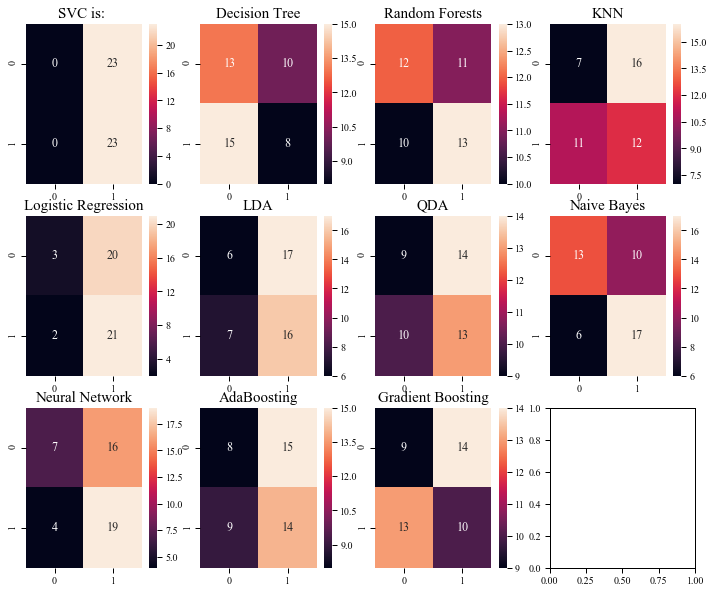

In [50]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":15, "xtick.labelsize":10, "ytick.labelsize":10}) # set the background

f,ax=plt.subplots(3,4,figsize=(12,10))

acc=[]

model=svm.SVC()
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,0],annot=True,fmt='d')
ax[0,0].set_title('SVC is: ')

model=DecisionTreeClassifier()
model.fit(X1_train,y_train)
y_pred =model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,1],annot=True,fmt='d')
ax[0,1].set_title('Decision Tree')

model=RandomForestClassifier(n_estimators=50)
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,2],annot=True,fmt='d')
ax[0,2].set_title('Random Forests')

model=KNeighborsClassifier(n_neighbors=2, p=2,weights='distance')
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,3],annot=True,fmt='d')
ax[0,3].set_title('KNN')

model=LogisticRegression()
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,0],annot=True,fmt='d')
ax[1,0].set_title('Logistic Regression')

model=LDA()
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,1],annot=True,fmt='d')
ax[1,1].set_title('LDA')

model=QDA()
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,2],annot=True,fmt='d')
ax[1,2].set_title('QDA')

model=GaussianNB()
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,3],annot=True,fmt='d')
ax[1,3].set_title('Naive Bayes')

model=MLPClassifier()
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,0],annot=True,fmt='d')
ax[2,0].set_title('Neural Network')

model=AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,1],annot=True,fmt='d')
ax[2,1].set_title('AdaBoosting')

model=GradientBoostingClassifier()
model.fit(X1_train,y_train)
y_pred = model.predict(X1_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,2],annot=True,fmt='d')
ax[2,2].set_title('Gradient Boosting')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [51]:
X11=X[['price_ratio','tweet_diff','stkv_ratio','twtcount_ratio','return_diff']]

In [52]:
C=range(10,300,10)
gamma=[1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
# kernel=['rbf','linear']
hyper={'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X11,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 319 candidates, totalling 957 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5398230088495575
SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 957 out of 957 | elapsed:    3.5s finished


In [53]:
n_estimators=range(10,100,10)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X11,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.48672566371681414
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.2s finished


In [54]:
n_neighbors=[2,3,4,5,6,7,8,9,10]
weights=['uniform','distance']
hyper={'n_neighbors':n_neighbors,'weights':weights}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X11,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.504424778761062
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.2s finished


In [55]:
# aggregate all the methods in one plot
random_state = 4
classifiers = []
classifiers.append(svm.SVC(random_state=random_state,C=30,gamma=2.0))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(n_estimators=30,random_state=random_state))
classifiers.append(KNeighborsClassifier(n_neighbors=2, p=2,weights='uniform'))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LDA())
classifiers.append(QDA())
classifiers.append(GaussianNB())
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X11, y, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Method":["SVC","DecisionTree",
"RandomForest","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis","NaiveBayes","NeuralNetwork",
                                                                                     "AdaBoosting","GradientBoosting"],"CrossValMeans":cv_means,"CrossValerrors": cv_std})
cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,SVC,0.538924,0.056914
1,NeuralNetwork,0.538924,0.042170
2,LogisticRegression,0.529915,0.053716
3,KNeighboors,0.502426,0.097075
4,QuadraticDiscriminantAnalysis,0.495726,0.033648
5,NaiveBayes,0.495726,0.012581
6,LinearDiscriminantAnalysis,0.477708,0.055574
7,GradientBoosting,0.457842,0.108363
8,AdaBoosting,0.414645,0.067665
9,RandomForest,0.406560,0.023496


## Fix this plot

In [56]:
# model=RandomForestClassifier(n_estimators=500,random_state=0)
# model.fit(X,y)
# model.feature_importances_
# X.columns

# imp = pd.DataFrame({"Features":["UA Customer Count","Nike Customer Count","UA Stock Price","Nike Stock Price","UA Stock Volume","Nike Stock Volume",
# "UA Tweet Attitude","Nike Tweet Attitude","UA Tweet Count","Nike Tweet Count","Geolocation Ratio","Stock Price Ratio","Tweet Attitude Difference",
#                                 "Stock Volume Ratio","Tweet Count Ratio","UA Stock Return","Nike Stock Return","Stock Return Difference"],
#                     "Importance":model.feature_importances_})
# imp = imp.sort_values(['Importance'],ascending=False).reset_index(drop=True).head(5)

features=["UA Customer Count","Nike Customer Count","UA Stock Price","Nike Stock Price","UA Stock Volume","Nike Stock Volume",
"UA Tweet Attitude","Nike Tweet Attitude","UA Tweet Count","Nike Tweet Count","Geolocation Ratio","Stock Price Ratio","Tweet Attitude Difference",
                                "Stock Volume Ratio","Tweet Count Ratio","UA Stock Return","Nike Stock Return","Stock Return Difference"]

# pd.Series(model.feature_importances_,features).sort_values(ascending=True).tail(5)
# pd.Series(model.feature_importances_,features).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
# imp

In [57]:
plt.rc('font', weight='bold')

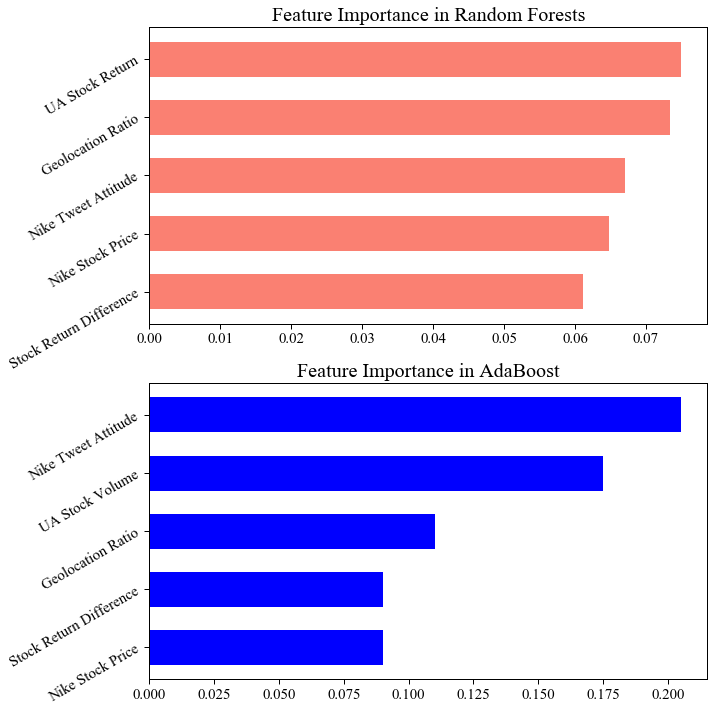

In [58]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":24,"axes.labelsize":18, "xtick.labelsize":15, "ytick.labelsize":15}) # set the background

# tree-based feature selection
f,ax=plt.subplots(2,1,figsize=(10,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,features).sort_values(ascending=True).tail(5).plot.barh(width=0.6,ax=ax[0],color='salmon')
ax[0].set_title('Feature Importance in Random Forests',fontsize=20)
#ax[0].set_label(fontsize=30)
ax[0].tick_params(axis='y', rotation=30)
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,features).sort_values(ascending=True).tail(5).plot.barh(width=0.6,ax=ax[1],color='blue')
#pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[1].set_title('Feature Importance in AdaBoost',fontsize=20)
ax[1].tick_params(axis='y', rotation=30)

# model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
# model.fit(X,y)
# pd.Series(model.feature_importances_,features).sort_values(ascending=True).tail(5).plot.barh(width=0.6,ax=ax[1,0],cmap='RdYlGn_r')
# #pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
# ax[1,0].set_title('Feature Importance in Gradient Boosting')
# model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
# model.fit(X,y)
# pd.Series(model.feature_importances_,features).sort_values(ascending=True).tail(5).plot.barh(width=0.6,ax=ax[1,1],color='#FD0F00')
# #pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
# ax[1,1].set_title('Feature Importance in XgBoost')
#plt.yticks(rotation=45)
#plt.show()

In [59]:
#X2=X[['nike_tweet','ua_stkv','geo_count_ratio','price_ratio','return_diff']]
X2=X[['return_ua','nike_tweet','geo_count_ratio','nike_price','geo_nike_count']]

In [60]:
C=range(10,300,10)
gamma=[1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
# kernel=['rbf','linear']
hyper={'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X2,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 319 candidates, totalling 957 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5398230088495575
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 957 out of 957 | elapsed:    3.1s finished


In [61]:
n_estimators=range(10,100,10)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X2,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.5575221238938053
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.2s finished


In [62]:
n_neighbors=[2,3,4,5,6,7,8,9,10]
weights=['uniform','distance']
hyper={'n_neighbors':n_neighbors,'weights':weights}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,cv=3, scoring="accuracy",verbose=1)
gd.fit(X2,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.5752212389380531
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.2s finished


In [63]:
# aggregate all the methods in one plot
random_state = 4
classifiers = []
classifiers.append(svm.SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(n_estimators=50,random_state=random_state))
classifiers.append(KNeighborsClassifier(n_neighbors=4, p=2,weights='uniform'))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LDA())
classifiers.append(QDA())
classifiers.append(GaussianNB())
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X2, y, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Method":["SVC","DecisionTree",
"RandomForest","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis","NaiveBayes","NeuralNetwork",
                                                                                     "AdaBoosting","GradientBoosting"],"CrossValMeans":cv_means,"CrossValerrors": cv_std})
cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,LinearDiscriminantAnalysis,0.600139,0.066101
1,NaiveBayes,0.591130,0.084062
2,QuadraticDiscriminantAnalysis,0.590206,0.127067
3,SVC,0.539848,0.000980
4,DecisionTree,0.539848,0.066210
5,AdaBoosting,0.539848,0.022089
6,GradientBoosting,0.539848,0.044146
7,RandomForest,0.521368,0.062903
8,LogisticRegression,0.495264,0.045848
9,NeuralNetwork,0.478632,0.044820


#### RFE

In [64]:
#RFE with logistic regression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()      
rfe = RFE(estimator=logreg, n_features_to_select=5, step=1)
rfe = rfe.fit(X,y)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['geo_count_ratio', 'tweet_diff', 'stkv_ratio', 'twtcount_ratio',
       'return_ua'],
      dtype='object')


In [65]:
X3=X[['geo_count_ratio', 'tweet_diff', 'stkv_ratio', 'twtcount_ratio', 'return_ua']]
#X3=X[['geo_count_ratio']]

score=cross_val_score(LogisticRegression(random_state = random_state), X3, y, scoring = "accuracy", cv = kfold)
score.mean()

0.574035574035574

In [66]:
#####standardization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X3)
X3 = scaler.transform(X3)

## Add name to this

In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X3)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.636412
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            value_ratio   No. Observations:                  113
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                            4
Date:                Sat, 25 May 2019   Pseudo R-squ.:                 0.07763
Time:                        22:43:03   Log-Likelihood:                -71.915
converged:                       True   LL-Null:                       -77.967
                                        LLR p-value:                   0.01659
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6102      0.288     -2.117      0.034      -1.175      -0.045
x2             0.1601      0.